In [1]:
!pip install iterative-stratification
!pip install wfdb
!pip install tsgm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 6.6 MB/s eta 0:00:00
  Created wheel for tsgm: filename=tsgm-0.0.5-py3-none-any.whl size=57108 sha256=b9480321fbe9342a2e2df1fec1032c4c9e46c07051b6cbde6d3d6c4798c139e6
  Stored in directory: /root/.cache/pip/wheels/f3/04/27/7d080cdaf3c4a00fc1accf8066ad2581cdd3da04b6b381c411
  Created wheel for antropy: filename=antropy-0.1.6-py3-none-any.whl size=16879 sha256=33ea4baafe772f669f10785739c438c62c0d13707890a92b3cb57c9976ab636c
  Stored in direct

In [2]:
#LIBERIAS
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io as sio
import re
import wfdb
from tabulate import tabulate
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
import scipy

#model libraries
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow import keras
from keras import layers
#from keras.utils import np_utils
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, confusion_matrix
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, ReLU, GlobalMaxPooling1D, Dense, Dropout, Permute, Reshape
import tensorflow as tf
import keras
from keras import models, layers
from keras.layers import concatenate
import tensorflow as tf
import keras
from keras import models, layers


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


from sklearn.model_selection import StratifiedShuffleSplit
from keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
from keras.models import Model
from sklearn.metrics import f1_score
import numpy as np
from keras.models import clone_model
from keras.utils import to_categorical
from tensorflow.keras import layers, models, regularizers
from sklearn.model_selection import StratifiedKFold

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


In [3]:
# import the libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from tensorflow import keras
import tsgm

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
#ACCEDIENDO A LOS DATOS..

#Conexión al drive
data_path_1 = '/content/gdrive/MyDrive/2023 Karol Ardila y Germán Moreno/Code/Señales Preprocesadas/GERMAN/datos_CONV1.h5'
data_path_3 = '/content/gdrive/MyDrive/2023 Karol Ardila y Germán Moreno/Code/Señales Preprocesadas/GERMAN/datos_CONV3.h5'
data_path_5 = '/content/gdrive/MyDrive/2023 Karol Ardila y Germán Moreno/Code/Señales Preprocesadas/GERMAN/datos_CONV5.h5'
data_path_ALL = '/content/gdrive/MyDrive/2023 Karol Ardila y Germán Moreno/Code/Señales Preprocesadas/GERMAN/datos_CONV_ALL.h5'

###Datos 1er Combinación

In [6]:
# Crear un diccionario para almacenar los datos cargados
loaded_data_1 = {}

# Cargar los datos desde el archivo H5 y almacenarlos en el diccionario
with h5py.File(data_path_1, 'r') as hf:
    for dataset_name_1 in hf.keys():
        # Obtener el nombre de la variable asociada al conjunto de datos
        variable_name_1 = dataset_name_1

        # Cargar los datos y almacenarlos en el diccionario
        loaded_data_1[variable_name_1] = np.array(hf[variable_name_1])

In [7]:
# Subdividir los datos 80% para train, 10% validation y 10% test
X_train1 = loaded_data_1['X_train']
y_train1 = loaded_data_1['y_train']

X_val1 = loaded_data_1['X_val']
y_val1 = loaded_data_1['y_val']


X_test1 = loaded_data_1['X_test']
y_test1 = loaded_data_1['y_test']

print("Tamaño de X_train:", X_train1.shape)
print("Tamaño de y_train:", y_train1.shape)
print("-----------------")
print("Tamaño de X_val:", X_val1.shape)
print("Tamaño de y_val:", y_val1.shape)
print("-----------------")
print("Tamaño de X_test:", X_test1.shape)
print("Tamaño de y_test:", y_test1.shape)


Tamaño de X_train: (457, 75000, 3)
Tamaño de y_train: (457, 1)
-----------------
Tamaño de X_val: (57, 75000, 3)
Tamaño de y_val: (57, 1)
-----------------
Tamaño de X_test: (58, 75000, 3)
Tamaño de y_test: (58, 1)


###Datos 3era Combinación

In [ ]:
# Crear un diccionario para almacenar los datos cargados
loaded_data_3 = {}

# Cargar los datos desde el archivo H5 y almacenarlos en el diccionario
with h5py.File(data_path_3, 'r') as hf:
    for dataset_name_3 in hf.keys():
        # Obtener el nombre de la variable asociada al conjunto de datos
        variable_name_3 = dataset_name_3

        # Cargar los datos y almacenarlos en el diccionario
        loaded_data_3[variable_name_3] = np.array(hf[variable_name_3])

In [ ]:
# Subdividir los datos 80% para train, 10% validation y 10% test
X_train3 = loaded_data_3['X_train']
y_train3 = loaded_data_3['y_train']

X_val3 = loaded_data_3['X_val']
y_val3 = loaded_data_3['y_val']


X_test3 = loaded_data_3['X_test']
y_test3 = loaded_data_3['y_test']

print("Tamaño de X_train:", X_train3.shape)
print("Tamaño de y_train:", y_train3.shape)
print("-----------------")
print("Tamaño de X_val:", X_val3.shape)
print("Tamaño de y_val:", y_val3.shape)
print("-----------------")
print("Tamaño de X_test:", X_test3.shape)
print("Tamaño de y_test:", y_test3.shape)

Tamaño de X_train: (534, 75000, 2)
Tamaño de y_train: (534, 1)
-----------------
Tamaño de X_val: (67, 75000, 2)
Tamaño de y_val: (67, 1)
-----------------
Tamaño de X_test: (67, 75000, 2)
Tamaño de y_test: (67, 1)


###Datos 5ta Combinación

In [ ]:
# Crear un diccionario para almacenar los datos cargados
loaded_data_5 = {}

# Cargar los datos desde el archivo H5 y almacenarlos en el diccionario
with h5py.File(data_path_5, 'r') as hf:
    for dataset_name_5 in hf.keys():
        # Obtener el nombre de la variable asociada al conjunto de datos
        variable_name_5 = dataset_name_5

        # Cargar los datos y almacenarlos en el diccionario
        loaded_data_5[variable_name_5] = np.array(hf[variable_name_5])

In [ ]:
# Subdividir los datos 80% para train, 10% validation y 10% test
X_train5 = loaded_data_5['X_train']
y_train5 = loaded_data_5['y_train']

X_val5 = loaded_data_5['X_val']
y_val5 = loaded_data_5['y_val']


X_test5 = loaded_data_5['X_test']
y_test5 = loaded_data_5['y_test']


print("Tamaño de X_train:", X_train5.shape)
print("Tamaño de y_train:", y_train5.shape)
print("-----------------")
print("Tamaño de X_val:", X_val5.shape)
print("Tamaño de y_val:", y_val5.shape)
print("-----------------")
print("Tamaño de X_test:", X_test5.shape)
print("Tamaño de y_test:", y_test5.shape)



Tamaño de X_train: (247, 75000, 3)
Tamaño de y_train: (247, 1)
-----------------
Tamaño de X_val: (31, 75000, 3)
Tamaño de y_val: (31, 1)
-----------------
Tamaño de X_test: (31, 75000, 3)
Tamaño de y_test: (31, 1)


###Datos Completos

In [9]:
# Crear un diccionario para almacenar los datos cargados
loaded_data_ALL = {}

# Cargar los datos desde el archivo H5 y almacenarlos en el diccionario
with h5py.File(data_path_ALL, 'r') as hf:
    for dataset_name_ALL in hf.keys():
        # Obtener el nombre de la variable asociada al conjunto de datos
        variable_name_ALL = dataset_name_ALL

        # Cargar los datos y almacenarlos en el diccionario
        loaded_data_ALL[variable_name_ALL] = np.array(hf[variable_name_ALL])

In [10]:
# Subdividir los datos 80% para train, 10% validation y 10% test
X_trainALL = loaded_data_ALL['X_train']
y_trainALL = loaded_data_ALL['y_train']

X_valALL = loaded_data_ALL['X_val']
y_valALL = loaded_data_ALL['y_val']


X_testALL = loaded_data_ALL['X_test']
y_testALL = loaded_data_ALL['y_test']

print("Tamaño de X_train:", X_trainALL.shape)
print("Tamaño de y_train:", y_trainALL.shape)
print("-----------------")
print("Tamaño de X_val:", X_valALL.shape)
print("Tamaño de y_val:", y_valALL.shape)
print("-----------------")
print("Tamaño de X_test:", X_testALL.shape)
print("Tamaño de y_test:", y_testALL.shape)

Tamaño de X_train: (600, 75000, 4)
Tamaño de y_train: (600, 1)
-----------------
Tamaño de X_val: (75, 75000, 4)
Tamaño de y_val: (75, 1)
-----------------
Tamaño de X_test: (75, 75000, 4)
Tamaño de y_test: (75, 1)


In [ ]:
X_trainALL[0]

array([[ 9.40164569e-02, -2.19514633e-03, -6.51873654e-03,
         2.48842610e-01],
       [ 7.08386669e-02,  1.02021165e-03, -6.51873654e-03,
         1.30069528e-01],
       [ 2.62659939e-02, -5.15743419e-05, -6.51873654e-03,
         3.89842235e-01],
       ...,
       [ 4.87111090e-03,  2.21808126e-01, -1.23999039e+00,
        -5.86041864e-01],
       [ 4.15794813e-03,  2.85043499e-01, -1.29187639e+00,
        -5.37421304e-01],
       [ 3.44478536e-03,  3.53637803e-01, -1.33668702e+00,
        -4.64490464e-01]])

In [11]:
#Hago un reshape para que la señal se ajuste a la entrada del modelo
X_train1V = np.transpose(X_trainALL, (0, 2, 1))
X_val1V = np.transpose(X_valALL, (0, 2, 1))
X_test1V = np.transpose(X_testALL, (0, 2, 1))

In [12]:
print("Tamaño de X_train:", X_train1V.shape)
print("Tamaño de X_val:", X_val1V.shape)
print("Tamaño de X_test:", X_test1V.shape)


Tamaño de X_train: (600, 4, 75000)
Tamaño de X_val: (75, 4, 75000)
Tamaño de X_test: (75, 4, 75000)


In [13]:
#Hago el mismo reshape para los labels
y_train1 = y_trainALL.reshape(-1, 1)
y_val1 = y_valALL.reshape(-1, 1)
y_test1 = y_testALL.reshape(-1, 1)

In [ ]:
print("Tamaño de Y_train:", y_train1.shape)
print("Tamaño de Y_val:", y_val1.shape)
print("Tamaño de Y_test:", y_test1.shape)

Tamaño de Y_train: (600, 1)
Tamaño de Y_val: (75, 1)
Tamaño de Y_test: (75, 1)


###Visualizacion del dato

Dimensiones de las señales después del procesamiento: (4, 75000)


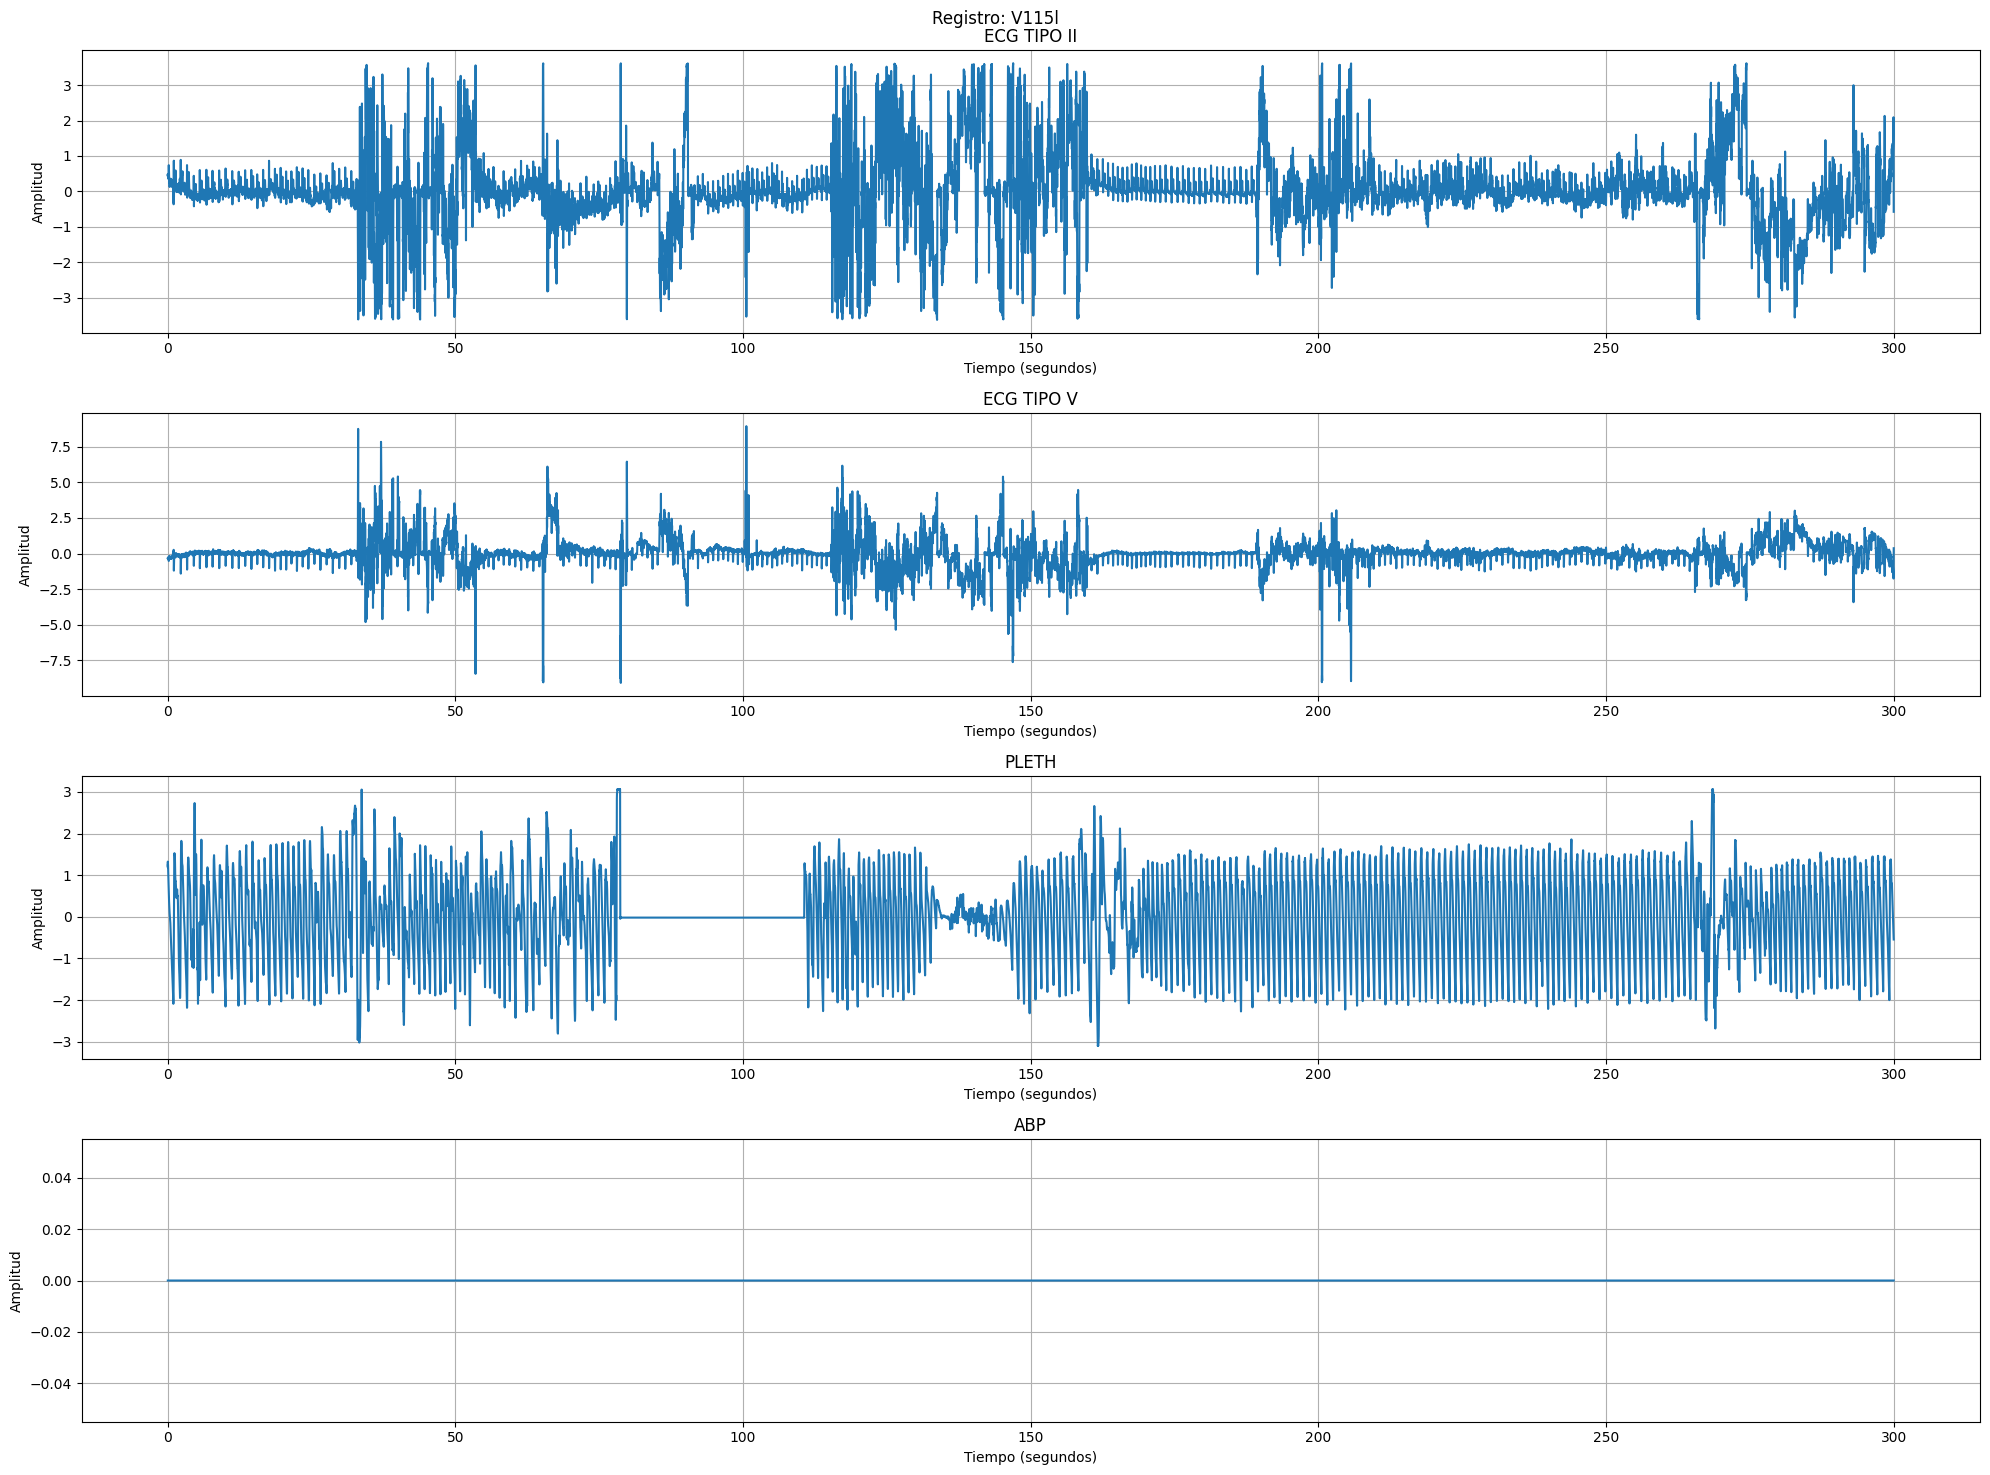

In [ ]:
registro_indice = 130
print("Dimensiones de las señales después del procesamiento:", X_train1V[registro_indice].shape)

X_train1V[registro_indice]


nombre_registro = X_train1V[registro_indice]
signals = X_train1V[registro_indice]
tiempo = np.arange(0, len(signals[0])) / 250.0

# Grafica cada señal
plt.figure(figsize=(20,15))
plt.suptitle("Registro: V115l")

# Señal 1
plt.subplot(4, 1, 1)
plt.plot(tiempo, signals[0])
plt.title("ECG TIPO II")
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.grid(True)

# Señal 2
plt.subplot(4, 1, 2)
plt.plot(tiempo, signals[1])
plt.title("ECG TIPO V")
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.grid(True)

# Señal 3
plt.subplot(4, 1, 3)
plt.plot(tiempo, signals[2])
plt.title("PLETH")
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.grid(True)

# Señal 4
plt.subplot(4, 1, 4)
plt.plot(tiempo, signals[3])
plt.title("ABP")
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.grid(True)


plt.tight_layout()

plt.show()


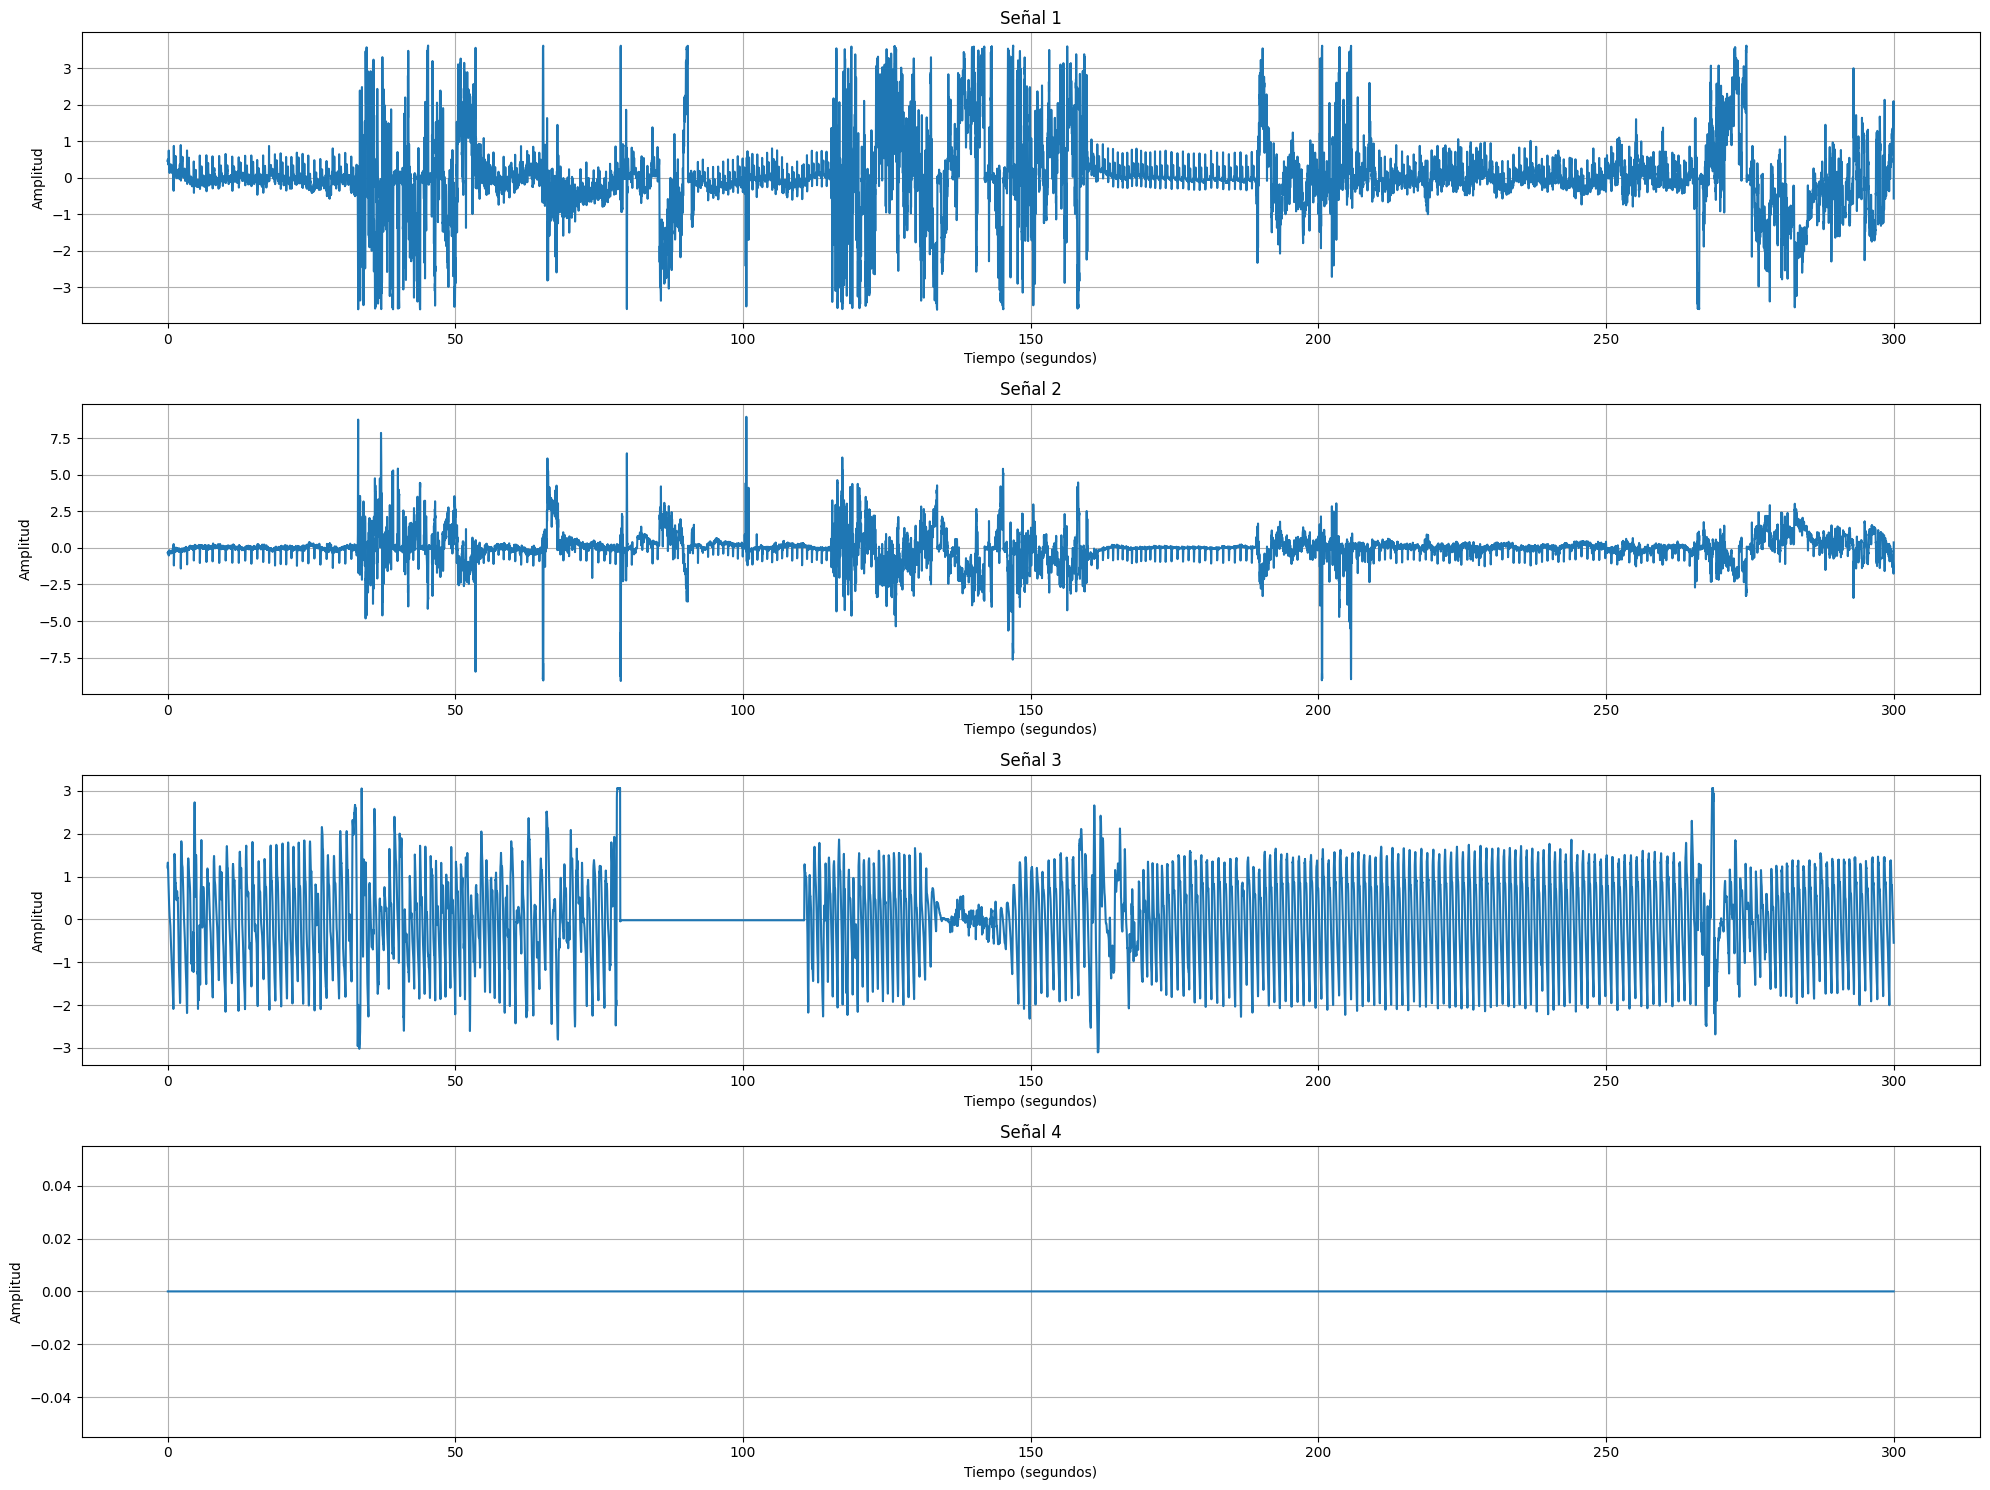

In [ ]:
registro_indice = 130


signals = X_train1V[registro_indice]
tiempo = np.arange(0, len(signals[0])) / 250.0

# Crear una figura más grande
plt.figure(figsize=(20, 15))

# Graficar cada señal por separado
for i in range(signals.shape[0]):
    plt.subplot(signals.shape[0], 1, i + 1)
    plt.plot(tiempo, signals[i])
    plt.title(f"Señal {i + 1}")
    plt.xlabel('Tiempo (segundos)')
    plt.ylabel('Amplitud')
    plt.grid(True)

plt.tight_layout()
plt.show()


Media de 0: El ruido gaussiano se distribuirá simétricamente alrededor de cero. Esto significa que el ruido agregado no tendrá un sesgo hacia valores positivos o negativos, lo cual es generalmente deseable para mantener la simetría de los datos.

Varianza de 1: Especificar una varianza diferente de 1.0 (valor por defecto) ajustará la "amplitud" del ruido agregado en relación con la media

In [14]:
np.random.seed(42)
tf.random.set_seed(42)

# Crear el modelo de aumentación de datos
aug_model = tsgm.models.augmentations.GaussianNoise()

# Especificar la cantidad de muestras sintéticas a generar
n_synthetic_samples = 600

# Aplicar la aumentación de datos a tus datos de entrenamiento
synthetic_data, synthetic_labels = aug_model.generate(X=X_train1V, y=y_train1, n_samples=n_synthetic_samples, variance=0.0001)

# Concatenar los datos sintéticos a tus datos originales
X_train_augmented = np.concatenate([X_train1V, synthetic_data])
y_train_augmented = np.concatenate([y_train1, synthetic_labels])

# Ahora X_train_augmented y y_train_augmented contienen los datos originales más las muestras sintéticas aumentadas.


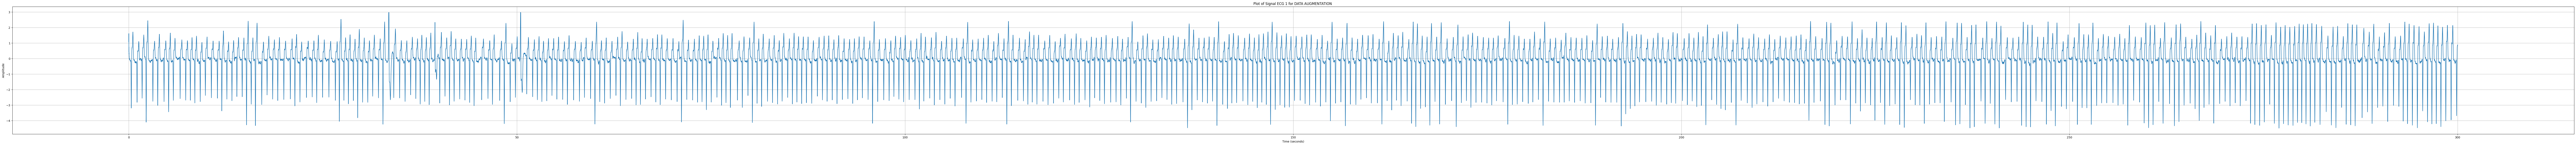

In [30]:
registro_indice = 1000
signal_index = 0  # Specify the index of the signal you want to plot

# Extract the signal for the selected register and index
signal = X_train_augmented[registro_indice][signal_index]

# Generate time axis
tiempo = np.arange(0, len(signal)) / 250.0

# Plotting
plt.figure(figsize=(160, 8))
plt.plot(tiempo, signal)

# Set plot labels and title
plt.title(f'Plot of Signal ECG {signal_index + 1} for DATA AUGMENTATION ')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


In [21]:
registro_indice = 1000


signals = X_train_augmented[registro_indice]
tiempo = np.arange(0, len(signals[0])) / 250.0

# Crear una figura más grande
plt.figure(figsize=(100, 15))

# Graficar cada señal por separado
for i in range(signals.shape[0]):
    plt.subplot(signals.shape[0], 1, i + 1)
    plt.plot(tiempo, signals[i])
    plt.title(f"Señal {i + 1}")
    plt.xlabel('Tiempo (segundos)')
    plt.ylabel('Amplitud')
    plt.grid(True)

plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
X_train_augmented.shape

(1200, 4, 75000)

In [ ]:
y_train_augmented.shape

(1200, 1)

In [ ]:
y_train1[0]

array([0])

In [ ]:
y_train_augmented[1000]

array([0])

In [ ]:
X_train1V[0]

array([[-0.09295274, -0.12919542, -0.15387129, ...,  2.8126305 ,
         2.61136797,  2.40162311],
       [ 0.57350871,  0.6717545 ,  0.67634543, ..., -1.54198949,
        -1.4373164 , -1.32621602],
       [-0.8975068 , -0.96524096, -0.86363973, ..., -0.55827158,
        -0.47811949, -0.38950064]])

In [ ]:
X_train_augmented[0]

array([[-0.09295274, -0.12919542, -0.15387129, ...,  2.8126305 ,
         2.61136797,  2.40162311],
       [ 0.57350871,  0.6717545 ,  0.67634543, ..., -1.54198949,
        -1.4373164 , -1.32621602],
       [-0.8975068 , -0.96524096, -0.86363973, ..., -0.55827158,
        -0.47811949, -0.38950064]])

In [ ]:
# Concatenar las etiquetas originales y las etiquetas sintéticas (si las hay)
all_labels = np.concatenate([y_train1, synthetic_labels])

# Contar la cantidad de 0 y 1
count_0 = np.sum(all_labels == 0)
count_1 = np.sum(all_labels == 1)

# Crear un DataFrame
data = {'Etiqueta binaria': ["Falso", "Verdadero"], 'Cantidad': [count_0, count_1]}
df = pd.DataFrame(data)

# Mostrar la tabla
print(df)

  Etiqueta binaria  Cantidad
0            Falso       716
1        Verdadero       341


###Data Augmentation para SÓLO para datos de entrenamiento

In [ ]:
#Hago un reshape para que la señal se ajuste a la entrada del modelo
X_train1A = np.transpose(X_train_augmented, (0, 2, 1))


In [ ]:
registro_indice = 0


signals = X_train_augmented[registro_indice]
tiempo = np.arange(0, len(signals[0])) / 250.0

# Crear una figura más grande
plt.figure(figsize=(200, 15))

# Graficar cada señal por separado
for i in range(signals.shape[0]):
    plt.subplot(signals.shape[0], 1, i + 1)
    plt.plot(tiempo, signals[i])
    plt.title(f"Señal {i + 1}")
    plt.xlabel('Tiempo (segundos)')
    plt.ylabel('Amplitud')
    plt.grid(True)

plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.